**Autor**: *Julián David León Quintero*  

<style>
  .centered {
    text-align: center;
  }
</style>

# <div class="centered">**Simulación de la atenuación en la atmosfera**</div>

***Importación de librerías:*** 

In [1]:
# %pip install py4cats

***Lectura de los datos: (Line Spectral for each gas)***

## ***Atmospheres***


Py4CAtS --- Python for Computational ATmospheric Spectroscopy

A collection of Python scripts for (molecular) line-by-line absorption
(cross sections, optical depths, ...) and atmospheric radiative transfer

https://doi.org/10.3390/atmos10050262    --->   Atmosphere 10(5), 262, 2019
https://atmos.eoc.dlr.de/tools/Py4CAtS/

 Atmos1d: got p, T, air   and 8 molecules on 20 levels
 Atmos1d: got p, T, air   and 8 molecules on 25 levels
 WARNING --- atmTruncate:  zToA very small, assuming kilometer units


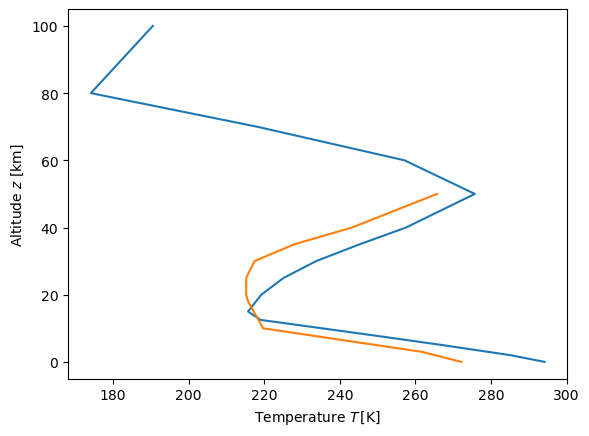

In [2]:
from py4cats import *
mls = atmRead('data_and_doc/data/atmos/20/mls.xy')
mlw = atmRead('data_and_doc/data/atmos/25/mlw.xy', zToA=50)
atmPlot(mls)
atmPlot(mlw)

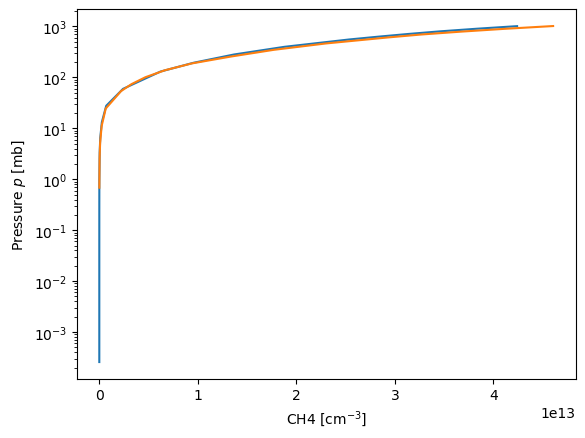

In [3]:
atmPlot([mls,mlw], 'CH4', 'mb') 

In [4]:
vmr(mls)

array([[1.876e-02, 3.300e-04, 3.017e-08, 3.200e-07, 1.500e-07, 1.700e-06,
        7.810e-01, 2.090e-01],
       [1.378e-02, 3.300e-04, 3.337e-08, 3.200e-07, 1.450e-07, 1.700e-06,
        7.810e-01, 2.090e-01],
       [9.680e-03, 3.300e-04, 3.694e-08, 3.200e-07, 1.399e-07, 1.700e-06,
        7.810e-01, 2.090e-01],
       [5.984e-03, 3.300e-04, 4.222e-08, 3.200e-07, 1.349e-07, 1.700e-06,
        7.810e-01, 2.090e-01],
       [3.813e-03, 3.300e-04, 4.821e-08, 3.200e-07, 1.312e-07, 1.697e-06,
        7.810e-01, 2.090e-01],
       [2.225e-03, 3.300e-04, 5.512e-08, 3.200e-07, 1.303e-07, 1.687e-06,
        7.810e-01, 2.090e-01],
       [8.332e-04, 3.300e-04, 8.445e-08, 3.197e-07, 1.216e-07, 1.639e-06,
        7.810e-01, 2.090e-01],
       [2.472e-04, 3.300e-04, 1.304e-07, 3.096e-07, 9.962e-08, 1.579e-06,
        7.810e-01, 2.090e-01],
       [1.872e-05, 3.300e-04, 2.615e-07, 2.898e-07, 7.094e-08, 1.494e-06,
        7.810e-01, 2.090e-01],
       [3.400e-06, 3.300e-04, 5.000e-07, 2.724e-07, 3.9

## ***Lines***


 O2.vSEan                229 lines in   73.082169 ...  93.908723 cm-1   with   2.6e-35 < S <  3.4e-25   (T=296.0K)


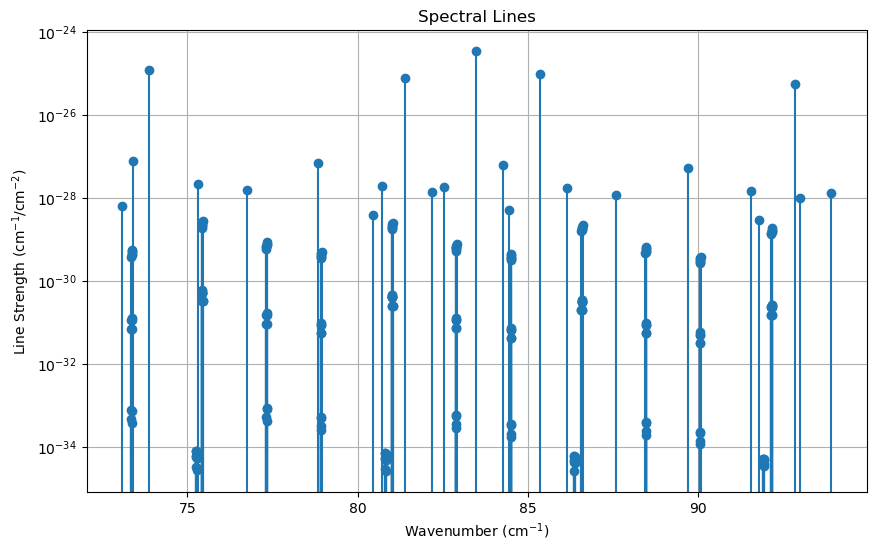

In [5]:
import matplotlib.pyplot as plt
from py4cats.lbl.lines import read_line_file

# Path to the .vSEan file
file_path = 'data_and_doc/data/lines/O2.vSEan'

# Step 1: Read the .vSEan file into a structured NumPy array
line_data = read_line_file(file_path)

# Step 2: Extract relevant data for plotting
wavenumber = line_data['v']  # Wavenumber (nu)
line_strength = line_data['S']  # Line strength (sw)

# Step 3: Plot the data
plt.figure(figsize=(10, 6))
plt.stem(wavenumber, line_strength, basefmt=" ")  # Removed use_line_collection
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Line Strength (cm$^{-1}$/cm$^{-2}$)')
plt.title('Spectral Lines')
plt.yscale('log')  # Use logarithmic scale for line strength
plt.grid(True)
plt.show()

## ***Cross Sections***


 CO.vSEan                 58 lines in   73.061720 ...  93.975433 cm-1   with   5.8e-32 < S <  5.8e-22   (T=296.0K)
 lbl2xs:  CO        28.01amu  pressure [g/cm/s**2] 1.01325e+06 ---> 1013.25
                              temperature      [K]      296.0  ---> 296.0

 voigt line parameters at       1.01mb and    296.00K
 position           73.061720 <=  v <=    93.975433
 strength             5.8e-32 <=  S <=     5.82e-22
 Lorentz width       4.35e-05 <=  L <=     4.88e-05
 Gauss width         8.51e-05 <=  D <=     0.000109
 cross section  CO          58 lines   1.01325mb  296.0K  12.5 lbl_2grids_chi Interval [73,97] 5.0 8 25.0 True 12.5

 lbl_2grids_chi:    vGrid 974073 2.463883573288217e-05   w 121760 0.00019711068586305736
 v:     974072    73.000000   73.000025   73.000049   73.000074   73.000099  ...    96.999901   96.999926   96.999951   96.999975   97.000000
 w:     121759    73.000000   73.000197   73.000394   73.000591   73.000788  ...    96.999212   96.999409   96.999606   96.

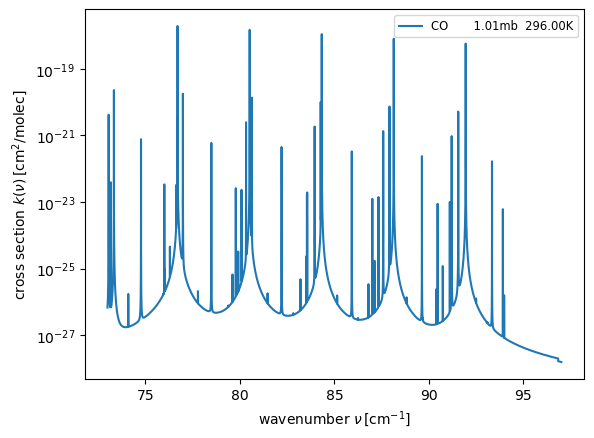

In [6]:
#from py4cats.lbl.lines import lbl2xs, read_line_file

# Path to the .vSEan file
file_path = 'data_and_doc/data/lines/CO.vSEan'

# Define parameters for lbl2xs
pressure = 1013.25  # Pressure in mb
temperature = 296.0  # Temperature in K
x_limits = (73.0, 97.0)  # Spectral range in cm^-1
line_shape = "Voigt"  # Line profile
sampling = 5.0  # Sampling rate
n_grids = 3  # Number of grids
grid_ratio = 8  # Grid ratio
n_widths = 25.0  # Fine grid limits
lagrange = 2  # Lagrange interpolation
verbose = True  # Verbose output

# Step 1: Read the .vSEan file into a structured NumPy array
line_data = read_line_file(file_path)

# Step 2: Pass the structured array to lbl2xs
xs = lbl2xs(
    line_data,
    pressure=pressure,
    temperature=temperature,
    xLimits=x_limits,
    lineShape=line_shape,
    sampling=sampling,
    nGrids=n_grids,
    gridRatio=grid_ratio,
    nWidths=n_widths,
    lagrange=lagrange,
    verbose=verbose,
)

# Print the cross-section data


print(xs)
xsPlot(xs)

print(line_data)


 H2O.vSEan               284 lines in   73.094200 ...  93.903401 cm-1   with   1.3e-30 < S <  1.2e-18   (T=296.0K)

 CO.vSEan                 58 lines in   73.061720 ...  93.975433 cm-1   with   5.8e-32 < S <  5.8e-22   (T=296.0K)
 lbl2xs:  H2O       18.02amu  pressure [g/cm/s**2] 1.01325e+06 ---> 1013.25
                              temperature      [K]      296.0  ---> 296.0

 voigt line parameters at       1.01mb and    296.00K
 position           73.094200 <=  v <=    93.903401
 strength             1.3e-30 <=  S <=     1.17e-18
 Lorentz width        7.7e-06 <=  L <=       0.0001
 Gauss width         0.000106 <=  D <=     0.000136
 cross section  H2O        284 lines   1.01325mb  296.0K  25.0 lbl_2grids_chi Interval [73,97] 5.0 8 25.0 True 25.0

 lbl_2grids_chi:    vGrid 739417 3.245804797299491e-05   w 92428 0.00025966438378395926
 v:     739416    73.000000   73.000032   73.000065   73.000097   73.000130  ...    96.999870   96.999903   96.999935   96.999968   97.000000
 w:     

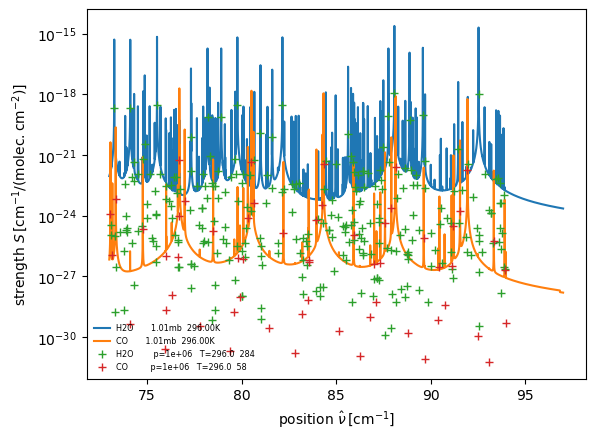

In [7]:
from py4cats.lbl.lbl2xs import lbl2xs  # Changed import to get the function directly
from py4cats.lbl.lines import read_line_file
from py4cats.art.xSection import xsPlot
import numpy as np


# Path to the .vSEan files
file_path1 = 'data_and_doc/data/lines/H2O.vSEan'
file_path2 = 'data_and_doc/data/lines/CO.vSEan'
#file_path3 = 'data_and_doc/data/lines/CH4.vSEan'
#file_path4 = 'data_and_doc/data/lines/H2O.vSEan'
#file_path5 = 'data_and_doc/data/lines/OH.vSEan'
#file_path6 = 'data_and_doc/data/lines/O3.vSEan'

# Define parameters for lbl2xs
pressure = 1013.25  # Pressure in mb
temperature = 296.0  # Temperature in K
x_limits = (73.0, 97.0)  # Spectral range in cm^-1
line_shape = "Voigt"  # Line profile
sampling = 5.0  # Sampling rate
n_grids = 3  # Number of grids
grid_ratio = 8  # Grid ratio
n_widths = 25.0  # Fine grid limits
lagrange = 2  # Lagrange interpolation
verbose = True  # Verbose output

# Step 1: Read the .vSEan files into structured NumPy arrays
line_data1 = read_line_file(file_path1)
line_data2 = read_line_file(file_path2)
#line_data3 = read_line_file(file_path3)
#line_data4 = read_line_file(file_path4)
#line_data5 = read_line_file(file_path5)
#line_data6 = read_line_file(file_path6)


combined_line_data = {
    'H2O': line_data1,
    'CO': line_data2
}

# Create a dictionary with both datasets
'''combined_line_data = {
    'H2O': line_data1,
    'CO': line_data2,
    'CH4': line_data3,
    'H2O': line_data4,
    'OH': line_data5,
    'O3': line_data6
}'''

# Step 2: Pass the dictionary to lbl2xs
xs = lbl2xs(
    combined_line_data,
    pressure=pressure,
    temperature=temperature,
    xLimits=x_limits,
    lineShape=line_shape,
    sampling=sampling,
    nGrids=n_grids,
    gridRatio=grid_ratio,
    nWidths=n_widths,
    lagrange=lagrange,
    verbose=verbose
)

# Print and plot the cross-section data
print(xs)
xsPlot(xs)
atlas(combined_line_data)  


 CO.vSEan                 58 lines in   73.061720 ...  93.975433 cm-1   with   5.8e-32 < S <  5.8e-22   (T=296.0K)

 CH4.vSEan               494 lines in   73.011517 ...  93.991050 cm-1   with     2e-29 < S <  2.8e-25   (T=296.0K)
 lbl2xs:  CO        28.01amu  pressure [g/cm/s**2] 1.01325e+06 ---> 1013.25
                              temperature      [K]      296.0  ---> 296.0

 voigt line parameters at       1.01mb and    296.00K
 position           73.061720 <=  v <=    93.975433
 strength             5.8e-32 <=  S <=     5.82e-22
 Lorentz width       4.35e-05 <=  L <=     4.88e-05
 Gauss width         8.51e-05 <=  D <=     0.000109
 cross section  CO          58 lines   1.01325mb  296.0K  12.5 lbl_2grids_chi Interval [73,97] 5.0 8 25.0 True 12.5

 lbl_2grids_chi:    vGrid 974073 2.463883573288217e-05   w 121760 0.00019711068586305736
 v:     974072    73.000000   73.000025   73.000049   73.000074   73.000099  ...    96.999901   96.999926   96.999951   96.999975   97.000000
 w:    

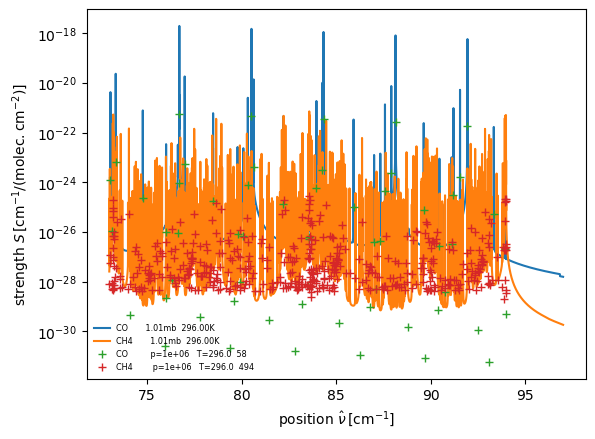

In [8]:
from py4cats.lbl.lbl2xs import lbl2xs  # Changed import to get the function directly
from py4cats.lbl.lines import read_line_file
from py4cats.art.xSection import xsPlot
import numpy as np


# Path to the .vSEan files
#file_path1 = 'data_and_doc/data/lines/H2O.vSEan'
file_path2 = 'data_and_doc/data/lines/CO.vSEan'
file_path3 = 'data_and_doc/data/lines/CH4.vSEan'
#file_path4 = 'data_and_doc/data/lines/H2O.vSEan'
#file_path5 = 'data_and_doc/data/lines/OH.vSEan'
#file_path6 = 'data_and_doc/data/lines/O3.vSEan'

# Define parameters for lbl2xs
pressure = 1013.25  # Pressure in mb
temperature = 296.0  # Temperature in K
x_limits = (73.0, 97.0)  # Spectral range in cm^-1
line_shape = "Voigt"  # Line profile
sampling = 5.0  # Sampling rate
n_grids = 3  # Number of grids
grid_ratio = 8  # Grid ratio
n_widths = 25.0  # Fine grid limits
lagrange = 2  # Lagrange interpolation
verbose = True  # Verbose output

# Step 1: Read the .vSEan files into structured NumPy arrays
#line_data1 = read_line_file(file_path1)
line_data2 = read_line_file(file_path2)
line_data3 = read_line_file(file_path3)
#line_data4 = read_line_file(file_path4)
#line_data5 = read_line_file(file_path5)
#line_data6 = read_line_file(file_path6)


combined_line_data = {
    'CO': line_data2,
    'CH4': line_data3
}

# Create a dictionary with both datasets
'''combined_line_data = {
    'H2O': line_data1,
    'CO': line_data2,
    'CH4': line_data3,
    'H2O': line_data4,
    'OH': line_data5,
    'O3': line_data6
}'''

# Step 2: Pass the dictionary to lbl2xs
xs = lbl2xs(
    combined_line_data,
    pressure=pressure,
    temperature=temperature,
    xLimits=x_limits,
    lineShape=line_shape,
    sampling=sampling,
    nGrids=n_grids,
    gridRatio=grid_ratio,
    nWidths=n_widths,
    lagrange=lagrange,
    verbose=verbose
)

# Print and plot the cross-section data
print(xs)
xsPlot(xs)
atlas(combined_line_data)  


 CO.vSEan                 58 lines in   73.061720 ...  93.975433 cm-1   with   5.8e-32 < S <  5.8e-22   (T=296.0K)

 CH4.vSEan               494 lines in   73.011517 ...  93.991050 cm-1   with     2e-29 < S <  2.8e-25   (T=296.0K)
 lbl2xs:  CO        28.01amu  pressure [g/cm/s**2] 1.01325e+06 ---> 1013.25
                              temperature      [K]      296.0  ---> 296.0

 voigt line parameters at       1.01mb and    296.00K
 position           73.061720 <=  v <=    93.975433
 strength             5.8e-32 <=  S <=     5.82e-22
 Lorentz width       4.35e-05 <=  L <=     4.88e-05
 Gauss width         8.51e-05 <=  D <=     0.000109
 cross section  CO          58 lines   1.01325mb  296.0K  12.5 lbl_2grids_chi Interval [73,97] 5.0 8 25.0 True 12.5

 lbl_2grids_chi:    vGrid 974073 2.463883573288217e-05   w 121760 0.00019711068586305736
 v:     974072    73.000000   73.000025   73.000049   73.000074   73.000099  ...    96.999901   96.999926   96.999951   96.999975   97.000000
 w:    

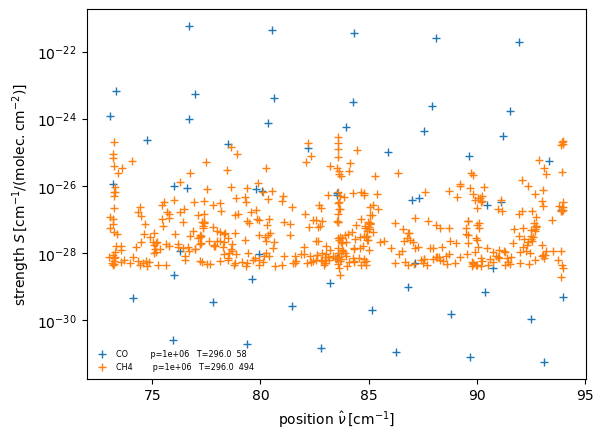

In [9]:
from py4cats.lbl.lbl2xs import lbl2xs  # Changed import to get the function directly
from py4cats.lbl.lines import read_line_file
from py4cats.art.xSection import xsPlot
import numpy as np


# Path to the .vSEan files
#file_path1 = 'data_and_doc/data/lines/H2O.vSEan'
file_path2 = 'data_and_doc/data/lines/CO.vSEan'
file_path3 = 'data_and_doc/data/lines/CH4.vSEan'
#file_path4 = 'data_and_doc/data/lines/H2O.vSEan'
#file_path5 = 'data_and_doc/data/lines/OH.vSEan'
#file_path6 = 'data_and_doc/data/lines/O3.vSEan'

# Define parameters for lbl2xs
pressure = 1013.25  # Pressure in mb
temperature = 296.0  # Temperature in K
x_limits = (73.0, 97.0)  # Spectral range in cm^-1
line_shape = "Voigt"  # Line profile
sampling = 5.0  # Sampling rate
n_grids = 3  # Number of grids
grid_ratio = 8  # Grid ratio
n_widths = 25.0  # Fine grid limits
lagrange = 2  # Lagrange interpolation
verbose = True  # Verbose output

# Step 1: Read the .vSEan files into structured NumPy arrays
#line_data1 = read_line_file(file_path1)
line_data2 = read_line_file(file_path2)
line_data3 = read_line_file(file_path3)
#line_data4 = read_line_file(file_path4)
#line_data5 = read_line_file(file_path5)
#line_data6 = read_line_file(file_path6)


combined_line_data = {
    'CO': line_data2,
    'CH4': line_data3
}

# Create a dictionary with both datasets
'''combined_line_data = {
    'H2O': line_data1,
    'CO': line_data2,
    'CH4': line_data3,
    'H2O': line_data4,
    'OH': line_data5,
    'O3': line_data6
}'''

# Step 2: Pass the dictionary to lbl2xs
xs = lbl2xs(
    combined_line_data,
    pressure=pressure,
    temperature=temperature,
    xLimits=x_limits,
    lineShape=line_shape,
    sampling=sampling,
    nGrids=n_grids,
    gridRatio=grid_ratio,
    nWidths=n_widths,
    lagrange=lagrange,
    verbose=verbose
)

# Print and plot the cross-section data
print(xs)

atlas(combined_line_data)  


 CH4.vSEan               494 lines in   73.011517 ...  93.991050 cm-1   with     2e-29 < S <  2.8e-25   (T=296.0K)

 H2O.vSEan               284 lines in   73.094200 ...  93.903401 cm-1   with   1.3e-30 < S <  1.2e-18   (T=296.0K)
 lbl2xs:  CH4       16.04amu  pressure [g/cm/s**2] 1.01325e+06 ---> 1013.25
                              temperature      [K]      296.0  ---> 296.0

 voigt line parameters at       1.01mb and    296.00K
 position           73.011517 <=  v <=    93.991050
 strength               2e-29 <=  S <=     2.84e-25
 Lorentz width        2.8e-05 <=  L <=      6.6e-05
 Gauss width         0.000112 <=  D <=     0.000145
 cross section  CH4        494 lines   1.01325mb  296.0K  12.5 lbl_2grids_chi Interval [73,97] 5.0 8 25.0 True 12.5

 lbl_2grids_chi:    vGrid 761481 3.1517571045858064e-05   w 95186 0.0002521405683668645
 v:     761480    73.000000   73.000032   73.000063   73.000095   73.000126  ...    96.999874   96.999905   96.999937   96.999968   97.000000
 w:     

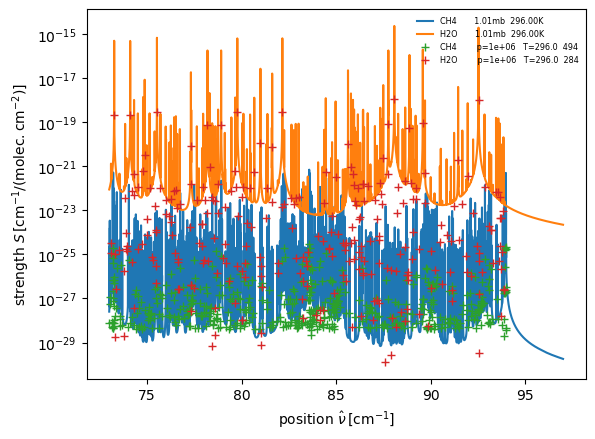

In [10]:
from py4cats.lbl.lbl2xs import lbl2xs  # Changed import to get the function directly
from py4cats.lbl.lines import read_line_file
from py4cats.art.xSection import xsPlot
import numpy as np


# Path to the .vSEan files
#file_path1 = 'data_and_doc/data/lines/H2O.vSEan'
#file_path2 = 'data_and_doc/data/lines/CO.vSEan'
file_path3 = 'data_and_doc/data/lines/CH4.vSEan'
file_path4 = 'data_and_doc/data/lines/H2O.vSEan'
#file_path5 = 'data_and_doc/data/lines/OH.vSEan'
#file_path6 = 'data_and_doc/data/lines/O3.vSEan'

# Define parameters for lbl2xs
pressure = 1013.25  # Pressure in mb
temperature = 296.0  # Temperature in K
x_limits = (73.0, 97.0)  # Spectral range in cm^-1
line_shape = "Voigt"  # Line profile
sampling = 5.0  # Sampling rate
n_grids = 3  # Number of grids
grid_ratio = 8  # Grid ratio
n_widths = 25.0  # Fine grid limits
lagrange = 2  # Lagrange interpolation
verbose = True  # Verbose output

# Step 1: Read the .vSEan files into structured NumPy arrays
#line_data1 = read_line_file(file_path1)
#line_data2 = read_line_file(file_path2)
line_data3 = read_line_file(file_path3)
line_data4 = read_line_file(file_path4)
#line_data5 = read_line_file(file_path5)
#line_data6 = read_line_file(file_path6)


combined_line_data = {
    'CH4': line_data3,
    'H2O': line_data4
}

# Create a dictionary with both datasets
'''combined_line_data = {
    'H2O': line_data1,
    'CO': line_data2,
    'CH4': line_data3,
    'H2O': line_data4,
    'OH': line_data5,
    'O3': line_data6
}'''

# Step 2: Pass the dictionary to lbl2xs
xs = lbl2xs(
    combined_line_data,
    pressure=pressure,
    temperature=temperature,
    xLimits=x_limits,
    lineShape=line_shape,
    sampling=sampling,
    nGrids=n_grids,
    gridRatio=grid_ratio,
    nWidths=n_widths,
    lagrange=lagrange,
    verbose=verbose
)

# Print and plot the cross-section data
print(xs)
xsPlot(xs)
atlas(combined_line_data)  

## ***Absortion Coefficients***

In [11]:
'''from py4cats.lbl.lbl2xs import lbl2xs
from py4cats.lbl.lines import read_line_file
from py4cats.art.xSection import xsPlot
from py4cats.var.pairTypes import Interval

from py4cats.lbl.lbl2xs import lbl2xs  # Changed import to get the function directly
from py4cats.lbl.lines import read_line_file
from py4cats.art.xSection import xsPlot
import numpy as np


# Path to the .vSEan files
file_path1 = 'data_and_doc/data/lines/H2O.vSEan'
file_path2 = 'data_and_doc/data/lines/CO.vSEan'
file_path3 = 'data_and_doc/data/lines/CH4.vSEan'
file_path4 = 'data_and_doc/data/lines/O2.vSEan'
file_path5 = 'data_and_doc/data/lines/OH.vSEan'
file_path6 = 'data_and_doc/data/lines/O3.vSEan'



# Step 1: Read the .vSEan files into structured NumPy arrays
line_data1 = read_line_file(file_path1)
line_data2 = read_line_file(file_path2)
line_data3 = read_line_file(file_path3)
line_data4 = read_line_file(file_path4)
line_data5 = read_line_file(file_path5)
line_data6 = read_line_file(file_path6)


# Define parameters for lbl2xs
# Get temperature and pressure from MLS atmosphere 
temperature = mls['T'][0]  # Temperature at surface level (K)
pressure = mls['p'][0] / 100  # Pressure at surface level (convert Pa to mb)
x_limits = (73.0, 2000.0)  # Spectral range in cm^-1
line_shape = "Voigt"  # Line profile
sampling = 5.0  # Sampling rate
n_grids = 3  # Number of grids
grid_ratio = 8  # Grid ratio
n_widths = 25.0  # Fine grid limits
lagrange = 2  # Lagrange interpolation
verbose = True  # Verbose output

## Create a dictionary without duplicate entries
combined_line_data = {
    'H2O': line_data1,
    'CO': line_data2,
    'CH4': line_data3,
    'O3': line_data6
}

# Dictionary to store cross-sections for all levels
xss_dict = {}

# Calculate cross sections for each atmospheric level
num_levels = len(mls)
for level in range(num_levels):
    # Get p,T for this level
    temperature = mls['T'][level]
    pressure = mls['p'][level] / 100  # Convert Pa to mb
    
    # Calculate cross sections for all molecules at this level
    level_xs = lbl2xs(
        combined_line_data,
        pressure=pressure,
        temperature=temperature,
        xLimits=x_limits,
        lineShape=line_shape,
        sampling=sampling,
        nGrids=n_grids,
        gridRatio=grid_ratio,
        nWidths=n_widths,
        lagrange=lagrange,
        verbose=verbose
    )
    
    # Store results for each molecule at this level
    for molecule in level_xs:
        if molecule not in xss_dict:
            xss_dict[molecule] = []
        xss_dict[molecule].append(level_xs[molecule])

# Convert cross-sections to absorption coefficients
absCoList = xs2ac(mls, xss_dict)

# Plot the results
acPlot(absCoList)

# Print information about the results
print(f"Number of atmospheric levels: {len(absCoList)}")
print(f"Molecules included: {list(xss_dict.keys())}")
print(f"Altitude range: {absCoList[0].z} to {absCoList[-1].z} meters")'''


'from py4cats.lbl.lbl2xs import lbl2xs\nfrom py4cats.lbl.lines import read_line_file\nfrom py4cats.art.xSection import xsPlot\nfrom py4cats.var.pairTypes import Interval\n\nfrom py4cats.lbl.lbl2xs import lbl2xs  # Changed import to get the function directly\nfrom py4cats.lbl.lines import read_line_file\nfrom py4cats.art.xSection import xsPlot\nimport numpy as np\n\n\n# Path to the .vSEan files\nfile_path1 = \'data_and_doc/data/lines/H2O.vSEan\'\nfile_path2 = \'data_and_doc/data/lines/CO.vSEan\'\nfile_path3 = \'data_and_doc/data/lines/CH4.vSEan\'\nfile_path4 = \'data_and_doc/data/lines/O2.vSEan\'\nfile_path5 = \'data_and_doc/data/lines/OH.vSEan\'\nfile_path6 = \'data_and_doc/data/lines/O3.vSEan\'\n\n\n\n# Step 1: Read the .vSEan files into structured NumPy arrays\nline_data1 = read_line_file(file_path1)\nline_data2 = read_line_file(file_path2)\nline_data3 = read_line_file(file_path3)\nline_data4 = read_line_file(file_path4)\nline_data5 = read_line_file(file_path5)\nline_data6 = read_lin

## ***Optical Lenght***


 H2O.vSEan               284 lines in   73.094200 ...  93.903401 cm-1   with   1.3e-30 < S <  1.2e-18   (T=296.0K)

 CO.vSEan                 58 lines in   73.061720 ...  93.975433 cm-1   with   5.8e-32 < S <  5.8e-22   (T=296.0K)

 CH4.vSEan               494 lines in   73.011517 ...  93.991050 cm-1   with     2e-29 < S <  2.8e-25   (T=296.0K)

 O2.vSEan                229 lines in   73.082169 ...  93.908723 cm-1   with   2.6e-35 < S <  3.4e-25   (T=296.0K)

 OH.vSEan                 72 lines in   73.220000 ...  93.541770 cm-1   with   1.7e-78 < S <  1.3e-18   (T=296.0K)

 O3.vSEan              14272 lines in   73.006000 ...  93.999400 cm-1   with   6.4e-29 < S <  1.4e-21   (T=296.0K)
 lbl2xs:  H2O       18.02amu  pressure [g/cm/s**2] 1.01325e+06 ---> 10130
                              temperature      [K]      296.0  ---> 294.2

 voigt line parameters at       10.1mb and    294.20K
 position           73.094200 <=  v <=    93.903401
 strength             1.2e-30 <=  S <=     1.18e-

/home/julianleon/.conda/envs/py4cats_fix/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/julianleon/.conda/envs/py4cats_fix/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


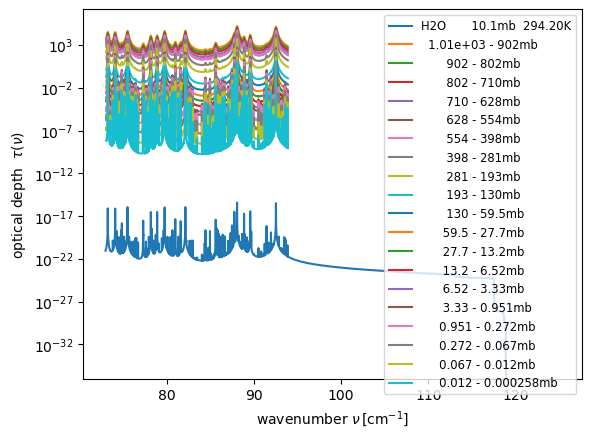

In [12]:
from py4cats.lbl.lbl2xs import lbl2xs
from py4cats.lbl.lines import read_line_file
from py4cats.art.xSection import xsPlot
from py4cats.var.pairTypes import Interval

from py4cats.lbl.lbl2xs import lbl2xs  # Changed import to get the function directly
from py4cats.lbl.lines import read_line_file
from py4cats.art.xSection import xsPlot
import numpy as np


# Path to the .vSEan files
file_path1 = 'data_and_doc/data/lines/H2O.vSEan'
file_path2 = 'data_and_doc/data/lines/CO.vSEan'
file_path3 = 'data_and_doc/data/lines/CH4.vSEan'
file_path4 = 'data_and_doc/data/lines/O2.vSEan'
file_path5 = 'data_and_doc/data/lines/OH.vSEan'
file_path6 = 'data_and_doc/data/lines/O3.vSEan'



# Step 1: Read the .vSEan files into structured NumPy arrays
line_data1 = read_line_file(file_path1)
line_data2 = read_line_file(file_path2)
line_data3 = read_line_file(file_path3)
line_data4 = read_line_file(file_path4)
line_data5 = read_line_file(file_path5)
line_data6 = read_line_file(file_path6)


# Define parameters for lbl2xs
# Get temperature and pressure from MLS atmosphere 
temperature = mls['T'][0]  # Temperature at surface level (K)
pressure = mls['p'][0] / 100  # Pressure at surface level (convert Pa to mb)
x_limits = (73.0, 125.0)  # Spectral range in cm^-1
line_shape = "Voigt"  # Line profile
sampling = 5.0  # Sampling rate
n_grids = 3  # Number of grids
grid_ratio = 8  # Grid ratio
n_widths = 25.0  # Fine grid limits
lagrange = 2  # Lagrange interpolation
verbose = True  # Verbose output

# Create a dictionary with datasets using the atmospheric conditions
combined_line_data = {
    'H2O': line_data1,
    #'CO': line_data2,
    #'CH4': line_data3,
    #'O2': line_data4,
    #'OH': line_data5,
    #'O3': line_data6
}

# Calculate cross sections using atmospheric conditions
xssDict = lbl2xs(
    combined_line_data,
    pressure=pressure,
    temperature=temperature,
    xLimits=x_limits,
    lineShape=line_shape,
    sampling=sampling,
    nGrids=n_grids,
    gridRatio=grid_ratio,
    nWidths=n_widths,
    lagrange=lagrange,
    verbose=verbose
)

xsPlot(xssDict)

dodl = lbl2od(mls, combined_line_data)
odPlot(dodl)

In [ ]:
from py4cats.lbl.lbl2xs import lbl2xs
from py4cats.lbl.lines import read_line_file
from py4cats.art.xSection import xsPlot
from py4cats.var.pairTypes import Interval

from py4cats.lbl.lbl2xs import lbl2xs  # Changed import to get the function directly
from py4cats.lbl.lines import read_line_file
from py4cats.art.xSection import xsPlot
import numpy as np

x_limits = (70.0, 2150.0)

# Create a dictionary with datasets using the atmospheric conditions
combined_line_data = {
    'H2O': line_data1,
    'CO': line_data2,
    'CH4': line_data3,
    #'O2': line_data4,
    #'OH': line_data5,
    #'O3': line_data6
}

# Calculate cross sections using atmospheric conditions
xssDict = lbl2xs(
    combined_line_data,
    pressure=pressure,
    temperature=temperature,
    xLimits=x_limits,
    lineShape=line_shape,
    sampling=sampling,
    nGrids=n_grids,
    gridRatio=grid_ratio,
    nWidths=n_widths,
    lagrange=lagrange,
    verbose=verbose
)

xsPlot(xssDict)

dodl = lbl2od(mls, combined_line_data)
odPlot(dodl)

 lbl2xs:  H2O       18.02amu  pressure [g/cm/s**2] 1.01325e+06 ---> 10130
                              temperature      [K]      296.0  ---> 294.2

 voigt line parameters at       10.1mb and    294.20K
 position           73.094200 <=  v <=    93.903401
 strength             1.2e-30 <=  S <=     1.18e-18
 Lorentz width       7.73e-05 <=  L <=      0.00101
 Gauss width         0.000106 <=  D <=     0.000136
 cross section  H2O        284 lines     10.13mb  294.2K  25.0 lbl_2grids_chi Interval [70,2150] 5.0 8 25.0 True 25.0

 lbl_2grids_chi:    vGrid 14142097 0.00014707862257475838   w 1767763 0.001176628980598067
 v:   14142096    70.000000   70.000147   70.000294   70.000441   70.000588  ...  2149.999412 2149.999559 2149.999706 2149.999853 2150.000000
 w:    1767762    70.000000   70.001177   70.002353   70.003530   70.004707  ...  2149.995293 2149.996470 2149.997647 2149.998823 2150.000000
   14142097     0.92sec     0.23ns:         0 < xs < 3.82777e-16
 lbl2xs:  CO        28.01amu  

 dod2ri:  Schwarzschild plane-parallel  ===>                10.8 <= I <=    16.9475   with          0 <= T <= 0.000000  (and  1397449 points)
 dod2ri:  Schwarzschild plane-parallel  ===>                6.05 <= I <=    14.7328   with          0 <= T <= 0.000000  (and  1397449 points)
 dod2ri:  Schwarzschild plane-parallel  ===>                6.05 <= I <=    14.7328   with          0 <= T <= 0.000000  (and  1397449 points)


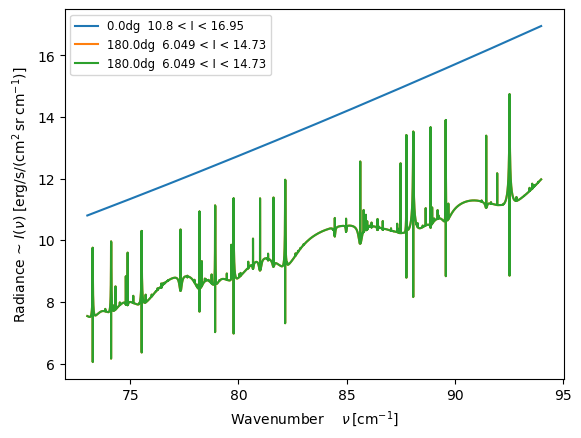

In [ ]:
radUp = dod2ri(dodl)  # downwelling radiation seen by an uplooking observer
radDown = dod2ri(dodl, 180.)  # upwelling radiation seen by a nadir viewer
radNadir = dod2ri(dodl, 180., mls['T'][0])  # forgot surface emission, assume T_surface=T_BoA=mls['T'][0]=mls[0]['T']
#Adding Planck BB background for  294.2K   ===>   3.21273 <= B <= 3.82278

riPlot([radUp,radDown,radNadir])